Student Name : Rahman Maqsood                                                    
Registration No : F2021313011                                                    
Subject  : Business Analytics And Strategy                                       
Analysis Name : Fish Weight Analysis

# **Project : Fish Weight Data Analysis**

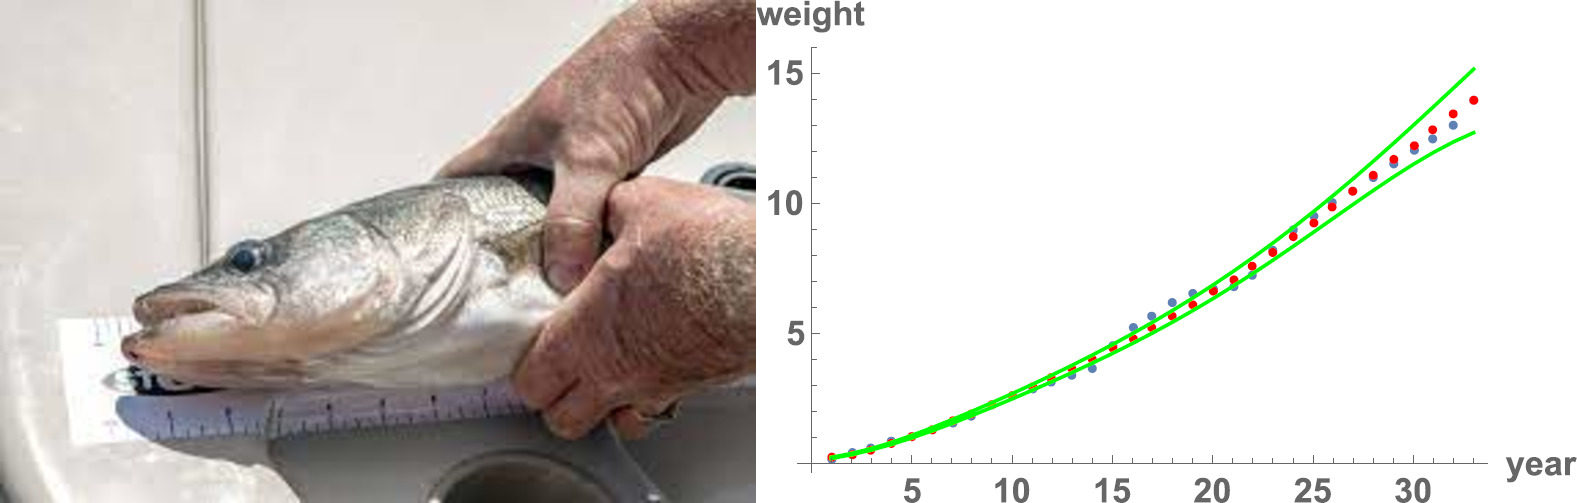

**Techniques for Data Analysis:**                                                
For Outliers Removal and Detection : Inter Quantile Range                          
For Modelling : Linear and Non-Linear Regression Analysis

In [ ]:
#Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import Dataset and convert into dataframe
new_df = pd.read_csv('/content/Fish.csv')
new_df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [ ]:
#The code describe the dispersion and tensdency of data points in dataset
new_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
new_df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Below Code Reprensents the each variable visualization in a scatter plot for to check relationship between variables

(Text(0.5, 0, 'Width'), Text(0, 0.5, 'Weight'))

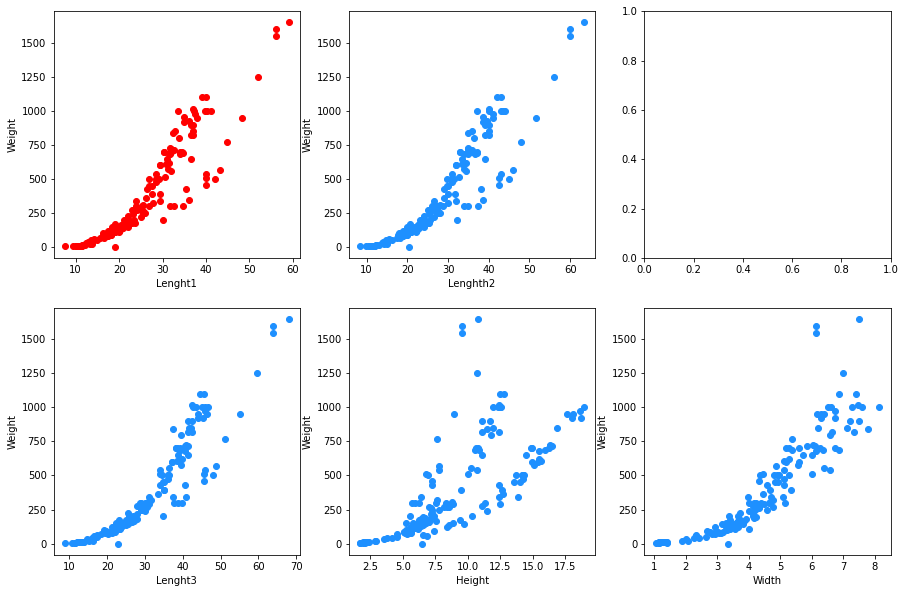

In [ ]:
fig , ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15,10))

ax[0][0].scatter(new_df.Length1,new_df.Weight,color='red')
ax[0][0].set_xlabel('Lenght1'),ax[0][0].set_ylabel('Weight')

ax[0][1].scatter(new_df.Length2,new_df.Weight, color = 'dodgerblue')
ax[0][1].set_xlabel('Lenghth2'),ax[0][1].set_ylabel('Weight')

ax[1][0].scatter(new_df.Length3,new_df.Weight, color = 'dodgerblue')
ax[1][0].set_xlabel('Lenght3'),ax[1][0].set_ylabel('Weight')

ax[1][1].scatter(new_df.Height,new_df.Weight, color = 'dodgerblue')
ax[1][1].set_xlabel('Height'),ax[1][1].set_ylabel('Weight')

ax[1][2].scatter(new_df.Width,new_df.Weight, color = 'dodgerblue')
ax[1][2].set_xlabel('Width'),ax[1][2].set_ylabel('Weight')

Below Code Reprensents the each variable visualization in box plots to check the outliers in dataset

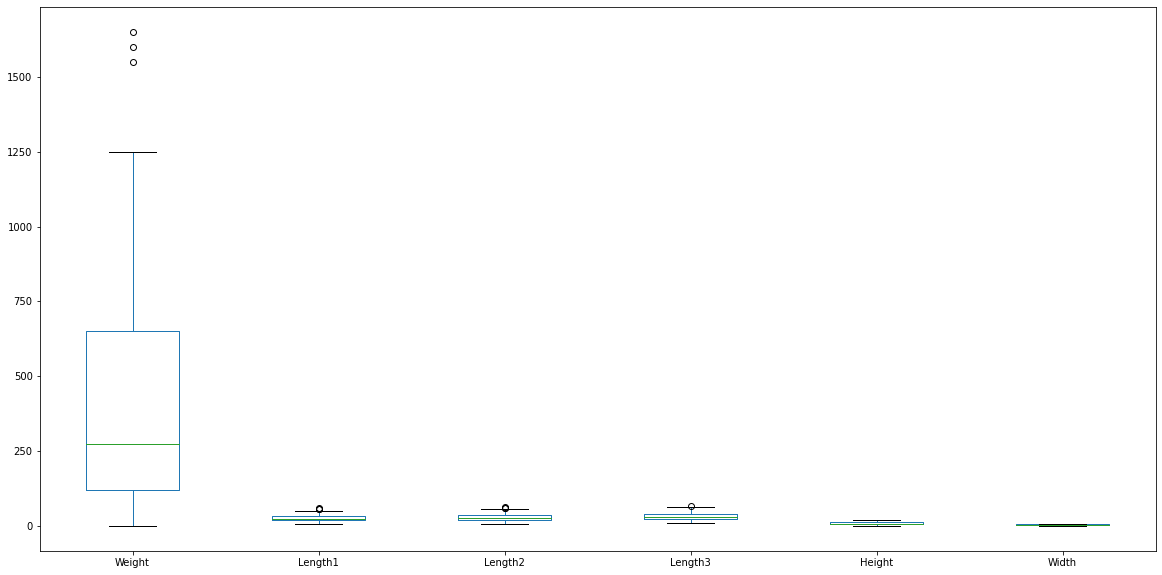

In [ ]:
new_df.plot(kind='box',figsize=(20,10))

In [ ]:
new_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# **Implement the Linear Regression Model**

In [ ]:
indx = np.random.rand(len(new_df)) <0.8
train = new_df[indx]
test = new_df[~indx]

In [ ]:
train.shape, test.shape

((127, 7), (32, 7))

In [ ]:
from sklearn import linear_model
new= linear_model.LinearRegression()


In [ ]:
train_x = np.asanyarray(train[['Length1',	'Length2'	,'Length3',	'Height',	'Width']])
train_y = np.asanyarray(train['Weight'])
new.fit(train_x,train_y)


LinearRegression()

In [ ]:
print('Theta-0: ', new.coef_)
print('Intercept:' , new.intercept_)

Theta-0:  [ 65.05697466  -9.5770534  -28.9943575   28.59117285  22.33120807]
Intercept: -487.1889268785904


In [ ]:
y_hat = new.predict([[24.0,26.3,31.2,12.4800,4.3056]])
#66.0 + 10.47*2.5 + 7.70*6 + 9.52*8.5
y_hat

array([370.64509308])

In [ ]:
test_x = np.asanyarray(test[['Length1',	'Length2'	,'Length3',	'Height',	'Width']])
test_y = np.asanyarray(test['Weight'])
test_y_hat =new.predict(test_x)
test_x

array([[29.1   , 31.5   , 36.4   , 13.7592,  4.368 ],
       [29.5   , 32.    , 37.3   , 13.9129,  5.0728],
       [30.4   , 33.    , 38.5   , 14.938 ,  5.1975],
       [30.9   , 33.5   , 38.6   , 15.633 ,  5.1338],
       [31.    , 33.5   , 38.7   , 14.4738,  5.7276],
       [31.4   , 34.    , 39.2   , 15.9936,  5.3704],
       [31.8   , 35.    , 40.9   , 16.36  ,  6.0532],
       [32.    , 35.    , 40.6   , 16.3618,  6.09  ],
       [24.    , 26.    , 29.2   ,  8.8768,  4.4968],
       [24.1   , 26.5   , 29.3   ,  8.1454,  4.2485],
       [28.5   , 31.    , 34.    , 10.744 ,  6.562 ],
       [37.3   , 40.    , 43.5   , 12.354 ,  6.525 ],
       [13.5   , 14.7   , 16.5   ,  6.8475,  2.3265],
       [15.    , 16.2   , 17.2   ,  4.5924,  2.6316],
       [19.3   , 21.3   , 22.8   ,  6.384 ,  3.534 ],
       [21.    , 23.    , 24.5   ,  5.2185,  3.626 ],
       [23.5   , 25.6   , 27.    ,  6.561 ,  4.239 ],
       [25.    , 26.5   , 28.    ,  7.168 ,  4.144 ],
       [25.2   , 27.3   , 28

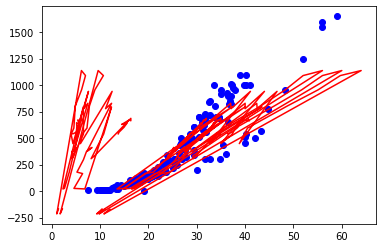

In [ ]:
plt.scatter(new_df.Length1,new_df.Weight,color='blue')
plt.plot(test_x,test_y_hat,'r-')
plt.show()

In [ ]:
print('Residual Error (MSE): %2f'  %np.mean(test_y -test_y_hat) **2)

Residual Error (MSE): 3.232375


In [ ]:
from sklearn.metrics import r2_score
print('R2 Score: %2f'%r2_score(test_y,test_y_hat))

R2 Score: 0.856963


# **Findings Show that the Multiple Linear postive relationship between the Weight (Dependent) and Lenght1,Lenght2,Lenght3,Width,Height (Independent)**

**Results Give 0.856963 Similarity Index Rate**